# word2vec

#### for word2vec:
https://towardsdatascience.com/implementing-word2vec-in-pytorch-skip-gram-model-e6bae040d2fb
#### for transD:
https://github.com/jimmywangheng/knowledge_representation_pytorch/
#### for RNN:
https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html

In [1]:
from collections import defaultdict, Counter
import networkx as nx
import numpy as np
import pylab as plt
import random
import torch
import torch.nn as nn
from copy import deepcopy
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable


In [15]:
# parameters and data
vocabulary_size = 10
embedding_dims = 2
sample_size = 10000
#pairs=list(zip(range(9),range(1,10)))+[(9,0)]+list(zip(range(10),range(10)))
#pairs=list(zip(range(9),range(1,10)))
pairs=list(zip(range(9),range(1,10)))+list(zip(range(10),range(10)))
idx_pairs=np.array(random.choices(pairs,k=sample_size))
idx_pairs = np.apply_along_axis(np.random.permutation,1,idx_pairs)

In [16]:
pairs

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [17]:
def oneHot(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [19]:
# model and training

W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(),
               requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(),
               requires_grad=True)
#W1 = Variable(W1_data.t(),
#              requires_grad=True)
#W2 = Variable(W1_data,
#              requires_grad=True)

num_epochs = 100
learning_rate = 0.01
Loss=[]
for epo in range(num_epochs):
    loss_val = 0
    for context, target in idx_pairs:
        x = Variable(oneHot(context)).float()
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)
        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        loss.backward()
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    if epo % 2 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')
    Loss.append(loss_val/len(idx_pairs))

Loss at epo 0: 1.399356114923954
Loss at epo 2: 1.0292332652807237
Loss at epo 4: 1.0267999783039092
Loss at epo 6: 1.025856315755844
Loss at epo 8: 1.0252606665611268
Loss at epo 10: 1.0248311063289641
Loss at epo 12: 1.0244993392944335
Loss at epo 14: 1.0242323592662812
Loss at epo 16: 1.0240114040851593
Loss at epo 18: 1.0238249147891998
Loss at epo 20: 1.0236650954723359
Loss at epo 22: 1.0235264299869538
Loss at epo 24: 1.023404911518097
Loss at epo 26: 1.0232975048542023
Loss at epo 28: 1.0232018991470337
Loss at epo 30: 1.0231163442611695
Loss at epo 32: 1.023039317560196
Loss at epo 34: 1.022969713783264
Loss at epo 36: 1.022906504392624
Loss at epo 38: 1.02284889626503
Loss at epo 40: 1.0227962481498718
Loss at epo 42: 1.022747976541519
Loss at epo 44: 1.0227035741329193
Loss at epo 46: 1.0226626495361328
Loss at epo 48: 1.0226248146533965
Loss at epo 50: 1.022589761543274
Loss at epo 52: 1.0225572061061858
Loss at epo 54: 1.0225269274711608
Loss at epo 56: 1.0224987321853638


Text(0, 0.5, 'Loss')

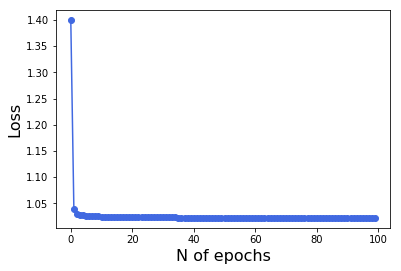

In [20]:
plt.plot(Loss,color='RoyalBlue',marker='o')
plt.xlabel('N of epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)

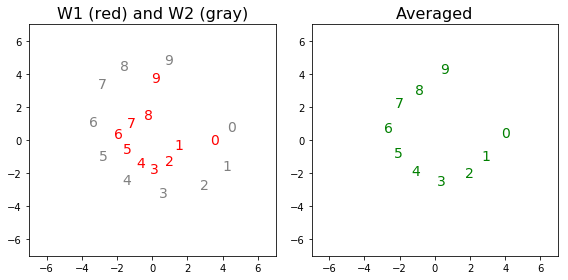

In [21]:
pos1=dict(zip(range(10),W1.data.numpy().T))
pos2=dict(zip(range(10),W2.data.numpy()))
#
fig = plt.figure(figsize=(8, 4),facecolor='white')
ax = fig.add_subplot(121)
for i in pos1:
    x,y=pos1[i]
    #plt.plot(x,y,marker='o',color='r')
    plt.text(x,y,i,size=14,color='r')
#
for i in pos2:
    x,y=pos2[i]
    #plt.plot(x,y,marker='^',color='gray')
    plt.text(x,y,i,size=14,color='gray')
#plt.legend(loc=3)
l=7
plt.xlim(-l,l)
plt.ylim(-l,l)
#annotation
#plt.plot(0,0,'ro')
#plt.text(0,0.5,'center vector (W1)',ha='center',color='r')
#plt.plot(0,0,marker='^',color='gray')
#plt.text(0,-0.5,'context vector (W2)',ha='center',color='gray')
plt.title('W1 (red) and W2 (gray)',fontsize=16)
#
ax = fig.add_subplot(122)
for i in pos1:
    x1,y1=pos1[i]
    x2,y2=pos2[i]
    #plt.plot((x1+x2)/2,(y1+y2)/2,marker='s',color='green')
    plt.text((x1+x2)/2,(y1+y2)/2,i,size=14,color='green')

plt.xlim(-l,l)
plt.ylim(-l,l)
plt.title('Averaged',fontsize=16)
#
plt.tight_layout()
plt.show()